In [84]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [85]:


def trim_set(frame: pd.DataFrame) -> pd.DataFrame:
    """Trims the DataFrame based on specified conditions."""
    return frame[((frame['TRB'] > 2) | (frame['AST'] > 5)) & (frame['PTS'] > 15)]


from datetime import datetime


def get_nba_season_year(date=None):
    """
    Determines the NBA season year based on a given date.
    If no date is provided, it uses the current date.

    Args:
    date (datetime, optional): The date for which to determine the NBA season year.
                               If None, the current date is used. Defaults to None.

    Returns:
    int: The NBA season year.
    """
    if date is None:
        date = datetime.now()

    current_month = date.month
    current_year = date.year

    # Define the NBA season year
    # If it's October or later, the NBA season year is the next calendar year
    nba_season_year = current_year if current_month < 10 else current_year + 1

    return nba_season_year

In [86]:
team_mapping = {
    'Atlanta Hawks': 'ATL',
    'Boston Celtics': 'BOS',
    'Brooklyn Nets': 'BKN',
    'Charlotte Bobcats': 'CHA',
    'Charlotte Hornets': 'CHO',  # For the current team, consider context for historical usage
    'Chicago Bulls': 'CHI',
    'Cleveland Cavaliers': 'CLE',
    'Dallas Mavericks': 'DAL',
    'Denver Nuggets': 'DEN',
    'Detroit Pistons': 'DET',
    'Golden State Warriors': 'GSW',
    'Houston Rockets': 'HOU',
    'Indiana Pacers': 'IND',
    'Kansas City Kings': 'KCK',
    'Los Angeles Clippers': 'LAC',
    'Los Angeles Lakers': 'LAL',
    'Memphis Grizzlies': 'MEM',
    'Miami Heat': 'MIA',
    'Milwaukee Bucks': 'MIL',
    'Minnesota Timberwolves': 'MIN',
    'New Jersey Nets': 'NJN',
    'New Orleans Hornets': 'NOH',
    'New Orleans Pelicans': 'NOP',
    'New Orleans/Oklahoma City Hornets': 'NOK',  # Temporary name due to Hurricane Katrina
    'New York Knicks': 'NYK',
    'Oklahoma City Thunder': 'OKC',
    'Orlando Magic': 'ORL',
    'Philadelphia 76ers': 'PHI',
    'Phoenix Suns': 'PHX',
    'Phoenix Suns': 'PHO',
    'Portland Trail Blazers': 'POR',
    'Sacramento Kings': 'SAC',
    'San Antonio Spurs': 'SAS',
    'San Diego Clippers': 'SDC',
    'Seattle SuperSonics': 'SEA',
    'Toronto Raptors': 'TOR',
    'Utah Jazz': 'UTA',
    'Vancouver Grizzlies': 'VAN',
    'Washington Bullets': 'WSB',
    'Washington Wizards': 'WAS'
}



In [87]:




current_season_start_year = get_nba_season_year() - 1
print(f'Training with data up to {current_season_start_year}')


mvp_data_dir = '../Basketball Reference Stat Scraper/Awards/MVP'
player_data_dir = '../Basketball Reference Stat Scraper/player_stats/'
team_data_dir = '../Basketball Reference Stat Scraper/team_stats/'

full_data = []
for year in range(1980, current_season_start_year + 1):
    player_data = pd.read_csv(os.path.join(player_data_dir, f'{year}_player_stats.csv'), index_col=0)

    mvp_data = pd.read_csv(os.path.join(mvp_data_dir, f'{year}_MVP.csv'), index_col=0)
    team_data = pd.read_csv(os.path.join(team_data_dir, f'{year}_tm_stats.csv'), index_col=0)
    team_data.Team = team_data.Team.str.strip('*')

    team_data['Tm'] = team_data.Team.map(team_mapping)


    # Prepend 'Team_' to team data columns except 'Team' and 'Year'
    team_data = team_data.rename(columns={col: f'Team_{col}' for col in team_data.columns if col not in ['Team', 'Year','Tm']})

    # Update team abbreviations in player and mvp data
    for df in [player_data, mvp_data]:
        df['Tm'] = df['Tm'].map(team_mapping).fillna(df['Tm'])

    # Merge player data with mvp data
    merged_data = pd.merge(
        player_data.assign(Player=lambda df: df.Player.str.strip('*')),
        mvp_data,
        how='left'
    ).fillna(0)

    # Merge with team data
    merged_data = pd.merge(
        merged_data,
        team_data,
        left_on=['Tm', 'Year'],
        right_on=['Tm', 'Year'],
        how='left'
    ).fillna(0)

    full_data.append(merged_data)





df = pd.concat(full_data)




Training with data up to 2023


In [88]:
df[df['Share'] != 0].sort_values('Share',ascending=False)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Team_MOV,Team_SOS,Team_SRS,Team_ORtg,Team_DRtg,Team_NRtg,Team_Pace,Team_FTr,Team_3PAr,Team_TS%
104,Stephen Curry,PG,27,GSW,79,79,34.2,10.2,20.2,0.504,...,10.76,-0.38,10.38,114.5,103.8,10.7,99.3,0.250,0.362,0.593
293,Shaquille O'Neal,C,27,LAL,79,79,40.0,12.1,21.1,0.574,...,8.55,-0.14,8.41,107.3,98.2,9.1,93.3,0.346,0.153,0.525
212,LeBron James,PF,28,MIA,76,76,37.9,10.1,17.8,0.565,...,7.87,-0.84,7.03,112.3,103.7,8.6,90.7,0.297,0.285,0.588
142,Kevin Garnett,PF,27,MIN,82,82,39.4,9.8,19.6,0.499,...,5.49,0.37,5.86,105.9,99.7,6.2,89.0,0.265,0.137,0.528
133,Kevin Durant,SF,25,OKC,81,81,38.5,10.5,20.8,0.503,...,6.34,0.32,6.66,110.5,103.9,6.6,95.4,0.303,0.271,0.566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,Shawn Marion,PF,26,PHO,81,81,38.8,7.6,15.9,0.476,...,7.12,-0.04,7.08,114.5,107.1,7.4,95.9,0.296,0.289,0.571
196,Allen Iverson,PG,30,PHI,72,72,43.1,11.3,25.3,0.447,...,-1.95,-0.15,-2.10,106.0,108.1,-2.1,92.7,0.356,0.158,0.538
253,Shawn Marion,PF,27,PHO,81,81,40.3,8.8,16.9,0.525,...,5.55,-0.07,5.48,111.5,105.8,5.7,95.8,0.206,0.293,0.568
11,Carmelo Anthony,SF,22,DEN,65,65,38.2,10.6,22.4,0.476,...,1.62,0.07,1.69,107.6,105.9,1.7,97.4,0.360,0.212,0.548


In [90]:
df_copy = df.copy()
df = df[(df['Player'] == 'LeBron James') |
        # (df['Player'] == 'Luka Dončić') |

        (df['Player'] == 'Kevin Durant')]
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Team_MOV,Team_SOS,Team_SRS,Team_ORtg,Team_DRtg,Team_NRtg,Team_Pace,Team_FTr,Team_3PAr,Team_TS%
202,LeBron James,SG,19,CLE,79,79,39.5,7.9,18.9,0.417,...,-2.62,-0.44,-3.07,101.4,104.2,-2.8,90.8,0.301,0.116,0.498
214,LeBron James,SF,20,CLE,80,80,42.4,9.9,21.1,0.472,...,0.79,-0.52,0.27,106.6,105.7,0.9,89.7,0.325,0.135,0.518
206,LeBron James,SF,21,CLE,79,79,42.5,11.1,23.1,0.480,...,2.23,-0.06,2.17,107.8,105.4,2.4,89.8,0.362,0.228,0.538
206,LeBron James,SF,22,CLE,78,78,40.9,9.9,20.8,0.476,...,3.83,-0.50,3.33,105.5,101.3,4.2,90.8,0.320,0.211,0.522
120,Kevin Durant,SG,19,SEA,80,80,34.6,7.3,17.1,0.430,...,-8.76,0.72,-8.04,100.5,109.5,-9.0,96.3,0.265,0.134,0.509
210,LeBron James,SF,23,CLE,75,74,40.4,10.6,21.9,0.484,...,-0.35,-0.17,-0.53,106.0,106.4,-0.4,90.2,0.308,0.231,0.520
121,Kevin Durant,SF,20,OKC,74,74,39.0,8.9,18.8,0.476,...,-6.10,0.06,-6.04,102.9,109.4,-6.5,93.6,0.308,0.141,0.521
207,LeBron James,SF,24,CLE,81,81,37.7,9.7,19.9,0.489,...,8.93,-0.25,8.68,112.4,102.4,10.0,88.7,0.312,0.259,0.560
124,Kevin Durant,SF,21,OKC,82,82,39.5,9.7,20.3,0.476,...,3.49,0.06,3.55,108.3,104.6,3.7,93.1,0.333,0.185,0.547
221,LeBron James,SF,25,CLE,76,76,39.0,10.1,20.1,0.503,...,6.52,-0.36,6.17,111.2,104.1,7.1,91.4,0.341,0.248,0.570


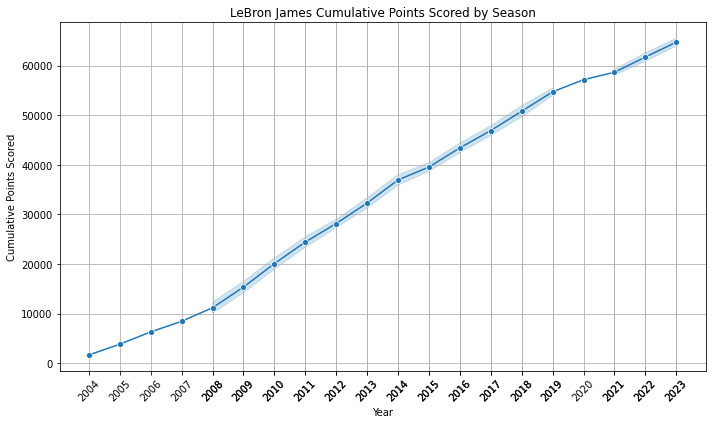

In [91]:
# Calculate total points for each season
df['Total_Points'] = df['PTS'] * df['G']

# Calculate cumulative points over the years
df['Cumulative_Points'] = df['Total_Points'].cumsum()

# Plotting the cumulative points
plt.figure(figsize=(10, 6),facecolor='white')
sns.lineplot(x='Year', y='Cumulative_Points', data=df, marker='o')
plt.title('LeBron James Cumulative Points Scored by Season')
plt.xlabel('Year')
plt.ylabel('Cumulative Points Scored')
plt.xticks(df['Year'], rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

/var/folders/0p/ttyhqytj0zxf3tq1njp37rqw0000gn/T/ipykernel_34233/2298414775.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_df['Total_Points'] = player_df['PTS'] * player_df['G']
/var/folders/0p/ttyhqytj0zxf3tq1njp37rqw0000gn/T/ipykernel_34233/2298414775.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_df['Cumulative_Points'] = player_df['Total_Points'].cumsum()
/var/folders/0p/ttyhqytj0zxf3tq1njp37rqw0000gn/T/ipykernel_34233/2298414775.py:10: SettingWithCopyWarning: 
A value is tryin

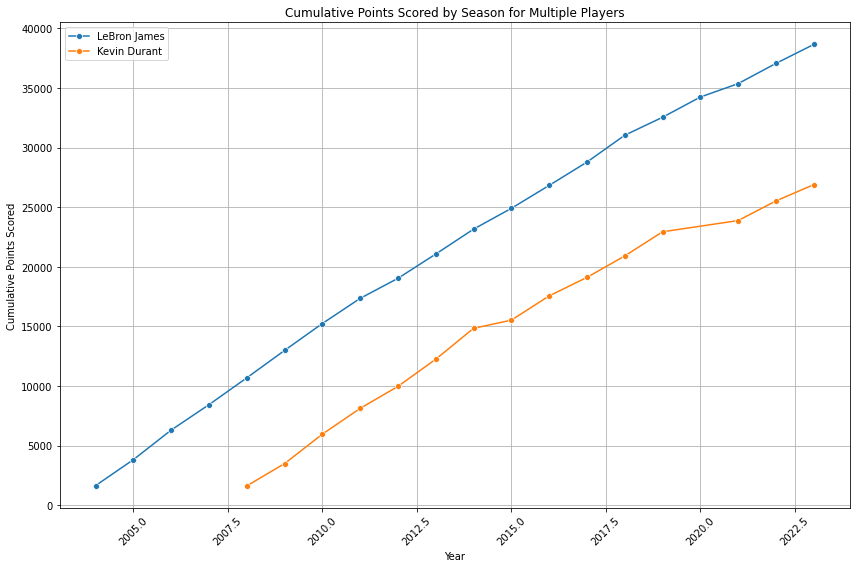

In [92]:

# Initialize the plot
plt.figure(figsize=(12, 8))

# Iterate through each player
for player in df['Player'].unique():
    # Filter data for the current player
    player_df = df[df['Player'] == player]

    # Calculate total points for each season
    player_df['Total_Points'] = player_df['PTS'] * player_df['G']

    # Calculate cumulative points over the years
    player_df['Cumulative_Points'] = player_df['Total_Points'].cumsum()

    # Plotting the cumulative points for the player
    sns.lineplot(x='Year', y='Cumulative_Points', data=player_df, marker='o', label=player)

# Customizing the plot
plt.title('Cumulative Points Scored by Season for Multiple Players')
plt.xlabel('Year')
plt.ylabel('Cumulative Points Scored')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

In [93]:
df_copy['Player'].unique()

array(['Kareem Abdul-Jabbar', 'Tom Abernethy', 'Alvan Adams', ...,
       'Jeenathan Williams', 'Mark Williams', 'Vince Williams Jr.'],
      dtype=object)

/var/folders/0p/ttyhqytj0zxf3tq1njp37rqw0000gn/T/ipykernel_34233/1626110765.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_df['Age'] = start_age + (player_df['Year'] - start_year)
/var/folders/0p/ttyhqytj0zxf3tq1njp37rqw0000gn/T/ipykernel_34233/1626110765.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  updated_df = updated_df.append(calculate_age(player, player_start_year, start_age))
/var/folders/0p/ttyhqytj0zxf3tq1njp37rqw0000gn/T/ipykernel_34233/1626110765.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

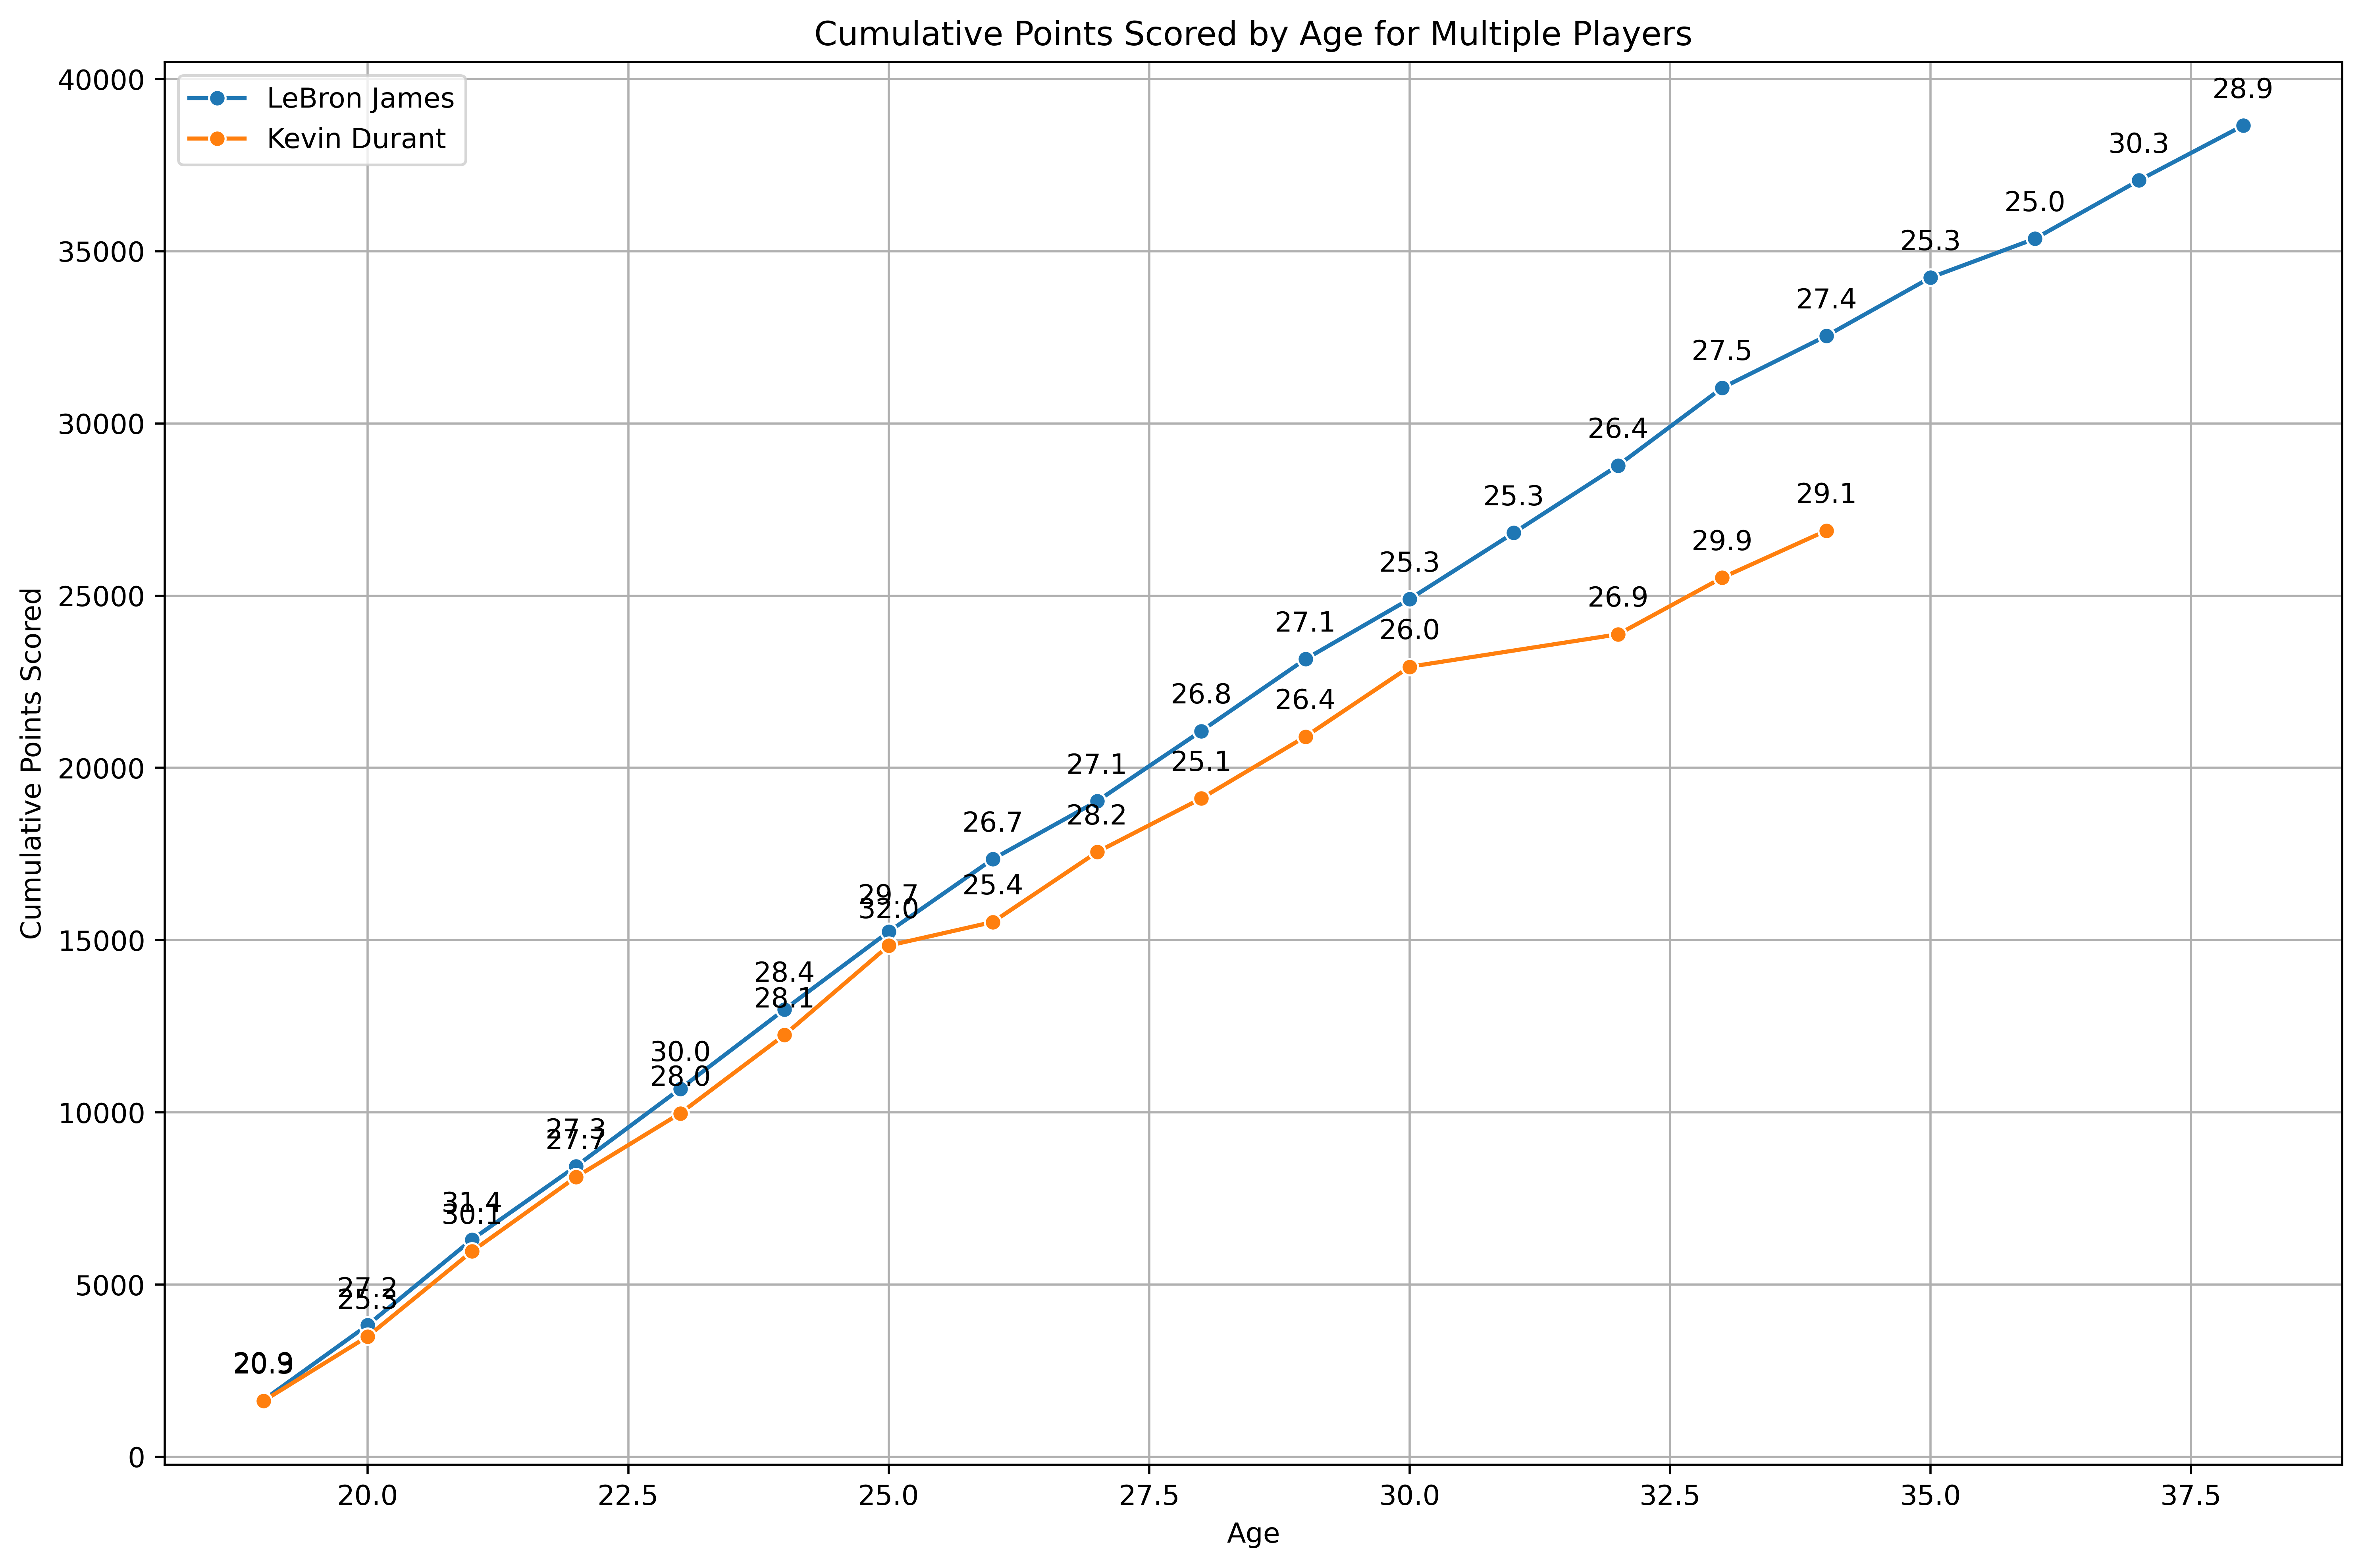

In [94]:
# Correcting the assignment of the 'Age' column

# We'll create a function to calculate the age for each season
def calculate_age(player, start_year, start_age):
    player_df = df[df['Player'] == player]
    player_df['Age'] = start_age + (player_df['Year'] - start_year)
    return player_df

# Creating a new DataFrame to store the updated data
updated_df = pd.DataFrame()
def get_starting_ages(df):
    """
    Create a dictionary of starting ages for each player in the dataset.

    Args:
    df (DataFrame): The pandas DataFrame containing the player data.

    Returns:
    dict: A dictionary with player names as keys and their starting ages as values.
    """
    starting_ages = {}
    for player in df['Player'].unique():
        starting_age = df[df['Player'] == player]['Age'].min()
        starting_ages[player] = starting_age
    return starting_ages
# Example starting ages for each player (these should be adjusted to actual data)
starting_ages = get_starting_ages(df)
# Calculate ages for each player and append to the updated DataFrame
for player, start_age in starting_ages.items():
    player_start_year = df[df['Player'] == player]['Year'].min()
    updated_df = updated_df.append(calculate_age(player, player_start_year, start_age))

# Reset index
updated_df.reset_index(drop=True, inplace=True)

# Adjusting the plotting loop to include annotations

# Initialize the plot
plt.figure(figsize=(12, 8), dpi=500, facecolor='white')

# Iterate through each player
for player in updated_df['Player'].unique():
    # Filter data for the current player
    player_df = updated_df[updated_df['Player'] == player]

    # Calculate total points for each season
    player_df['Total_Points'] = player_df['PTS'] * player_df['G']

    # Calculate cumulative points over the ages
    player_df['Cumulative_Points'] = player_df['Total_Points'].cumsum()

    # Plotting the cumulative points for the player by age
    sns.lineplot(x='Age', y='Cumulative_Points', data=player_df, marker='o', label=player)

    # Annotating each point with the PTS value
    for i in range(len(player_df)):
        plt.annotate(f"{player_df.iloc[i]['PTS']:.1f}",
                     (player_df.iloc[i]['Age'], player_df.iloc[i]['Cumulative_Points']),
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center

# Customizing the plot
plt.title('Cumulative Points Scored by Age for Multiple Players')
plt.xlabel('Age')
plt.ylabel('Cumulative Points Scored')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()


/var/folders/0p/ttyhqytj0zxf3tq1njp37rqw0000gn/T/ipykernel_34233/311870865.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_df['Total_Points'] = player_df['PTS'] * player_df['G']
/var/folders/0p/ttyhqytj0zxf3tq1njp37rqw0000gn/T/ipykernel_34233/311870865.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_df['Cumulative_Points'] = player_df['Total_Points'].cumsum()
/var/folders/0p/ttyhqytj0zxf3tq1njp37rqw0000gn/T/ipykernel_34233/311870865.py:45: SettingWithCopyWarning: 
A value is trying t

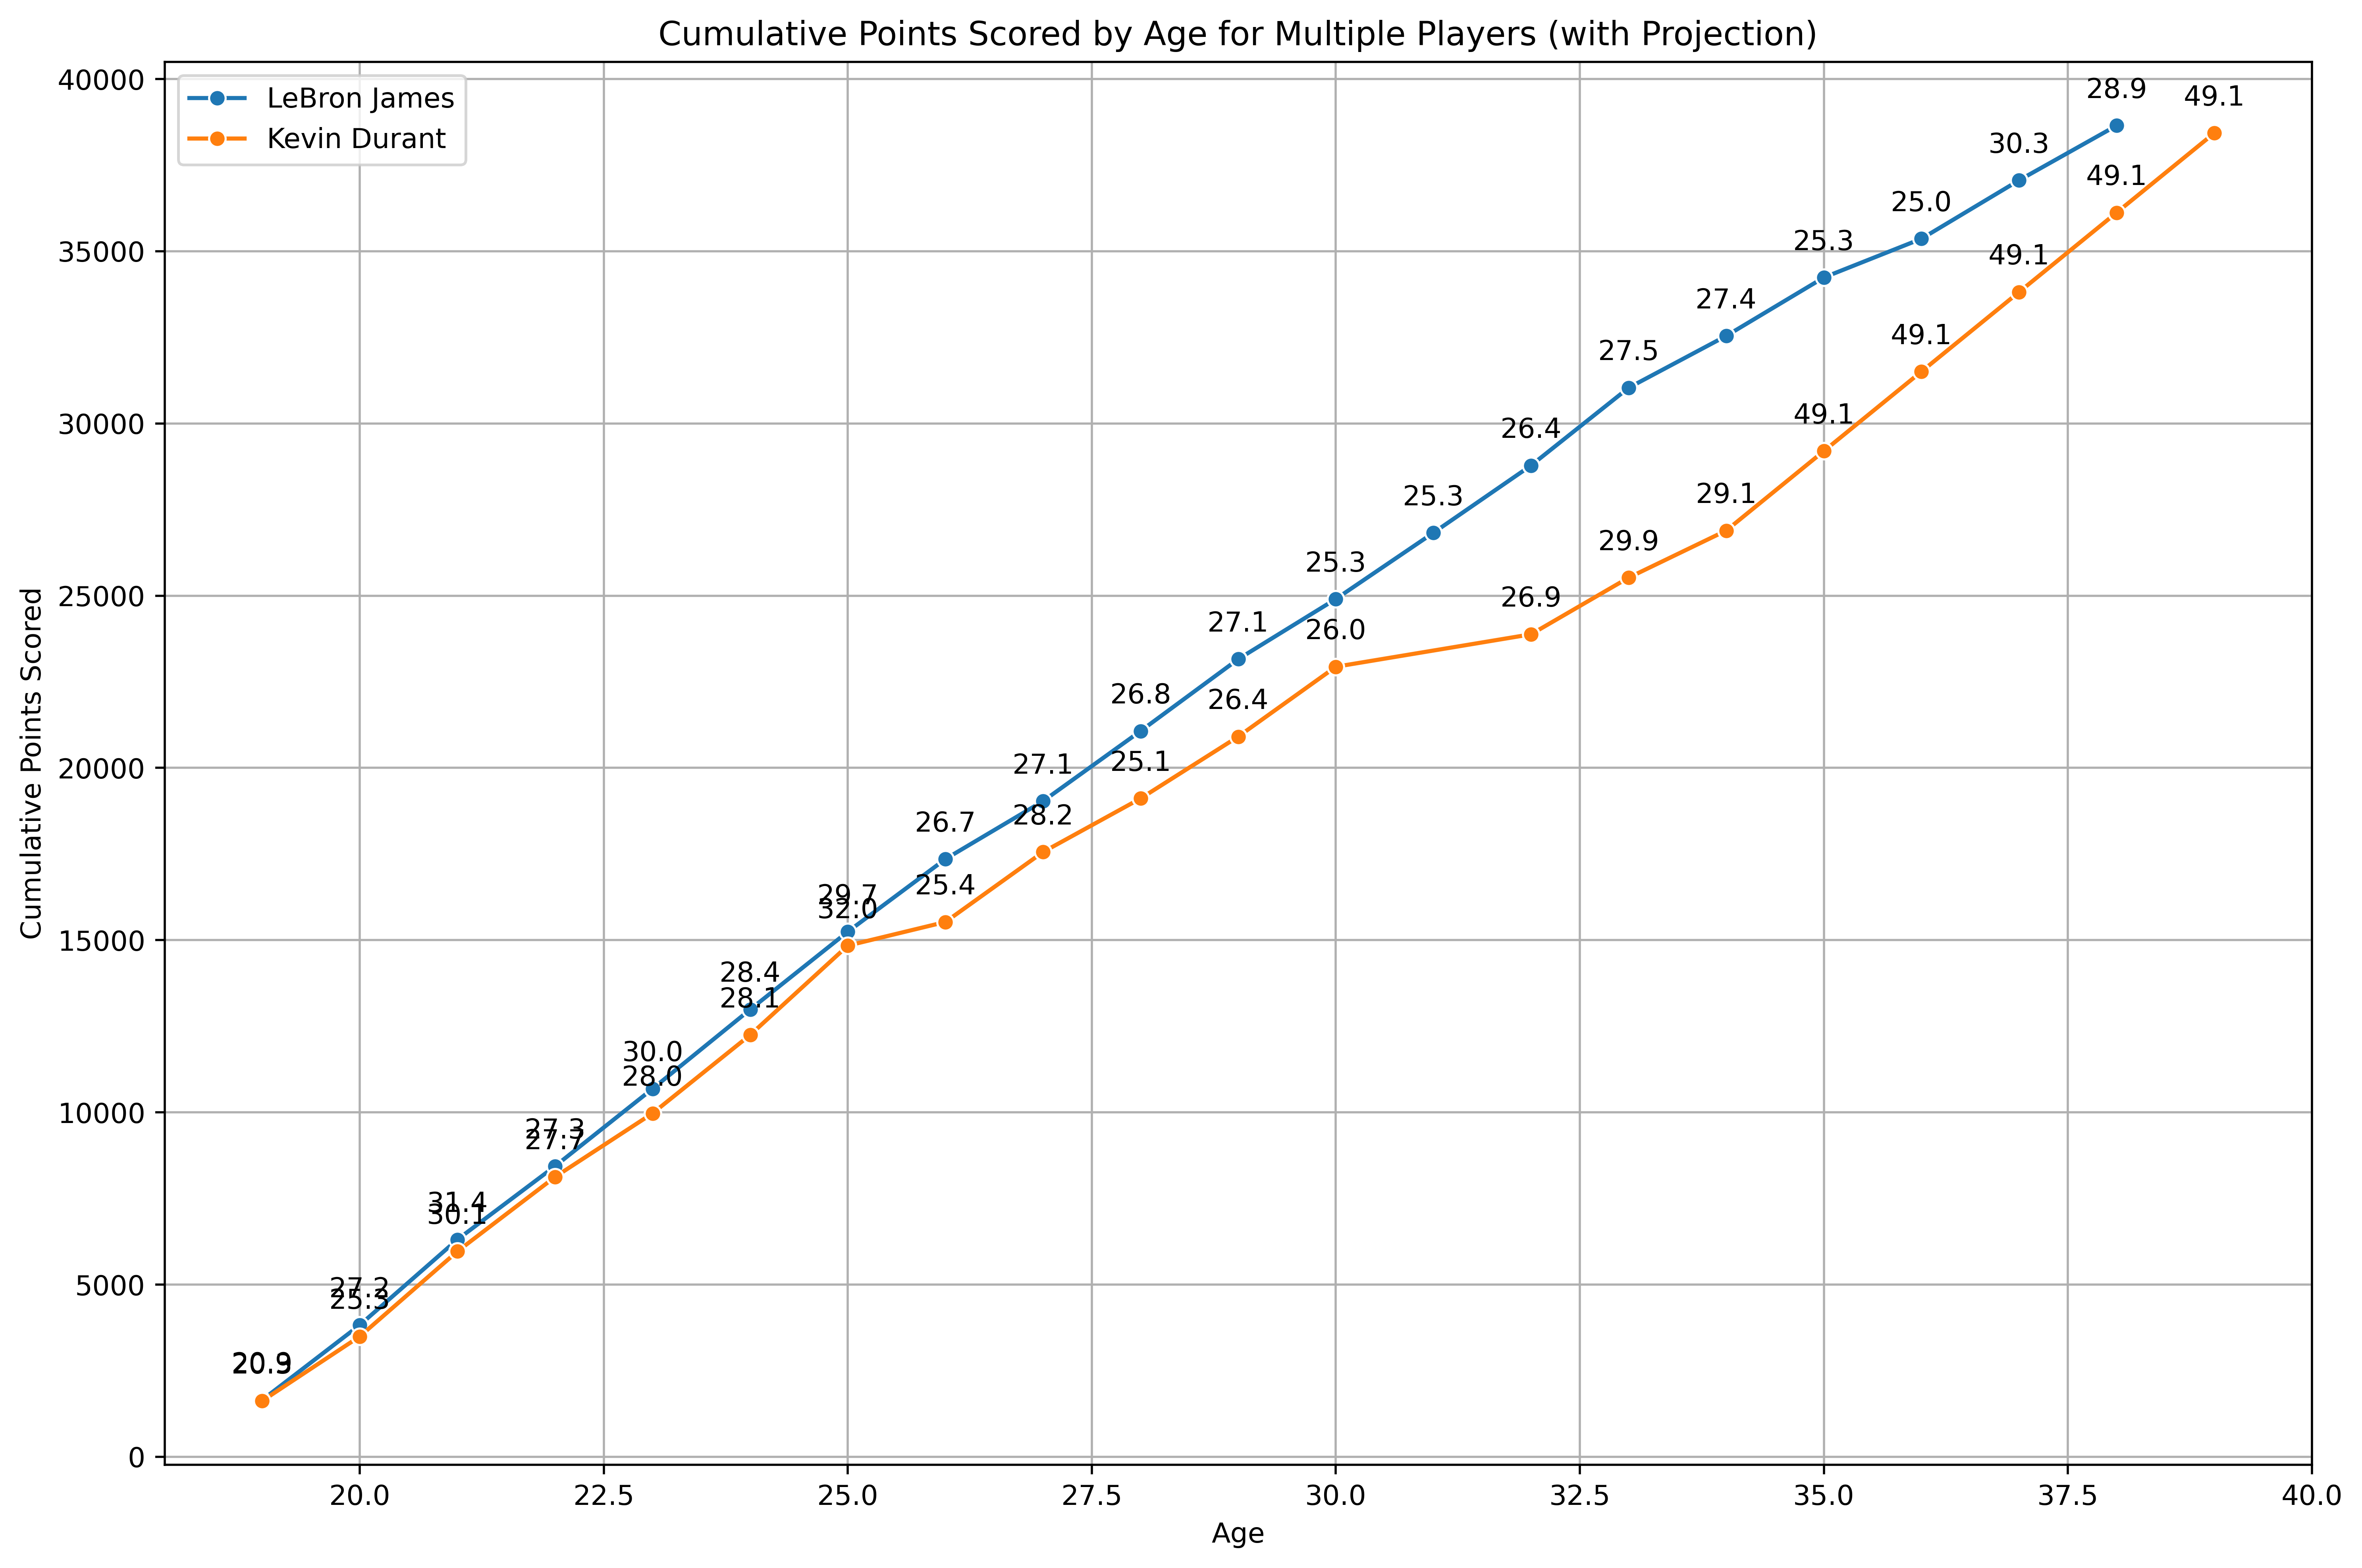

In [95]:
# Define the projection parameters
X = 5  # Number of projected years
Y = 20  # Additional points per game

# Function to project future performance
def project_future_performance(player_df, increase_ppg, additional_years):
    last_year = player_df['Year'].max()
    last_ppg = player_df.iloc[-1]['PTS']
    last_age = player_df.iloc[-1]['Age']

    future_years = [last_year + i for i in range(1, additional_years + 1)]
    future_ages = [last_age + i for i in range(1, additional_years + 1)]
    future_ppgs = [last_ppg + increase_ppg] * additional_years
    future_games = [player_df.iloc[-1]['G']] * additional_years  # Assuming same number of games

    future_df = pd.DataFrame({
        'Player': [player_df.iloc[-1]['Player']] * additional_years,
        'Year': future_years,
        'PTS': future_ppgs,
        'G': future_games,
        'Age': future_ages
    })

    return future_df

# Applying the projection to each player except LeBron James
for player in updated_df['Player'].unique():
    if player != 'LeBron James':
        player_df = updated_df[updated_df['Player'] == player]
        future_df = project_future_performance(player_df, Y, X)
        updated_df = pd.concat([updated_df, future_df])

# Reset index
updated_df.reset_index(drop=True, inplace=True)

# Plotting with projection
plt.figure(figsize=(12, 8), dpi=500, facecolor='white')

# Iterate through each player
for player in updated_df['Player'].unique():
    # Filter data for the current player
    player_df = updated_df[updated_df['Player'] == player]

    # Calculate total points for each season
    player_df['Total_Points'] = player_df['PTS'] * player_df['G']

    # Calculate cumulative points over the ages
    player_df['Cumulative_Points'] = player_df['Total_Points'].cumsum()

    # Plotting the cumulative points for the player by age
    sns.lineplot(x='Age', y='Cumulative_Points', data=player_df, marker='o', label=player)

    # Annotating each point with the PTS value
    for i in range(len(player_df)):
        plt.annotate(f"{player_df.iloc[i]['PTS']:.1f}",
                     (player_df.iloc[i]['Age'], player_df.iloc[i]['Cumulative_Points']),
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center

# Customizing the plot
plt.title('Cumulative Points Scored by Age for Multiple Players (with Projection)')
plt.xlabel('Age')
plt.ylabel('Cumulative Points Scored')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()